# Importing libraries

In [1]:
import camb
from camb import model
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import time
from velocileptors.LPT.lpt_rsd_fftw import LPT_RSD

In [2]:
param_ini_dict = {#'LRG1':'/Users/s2223060/Desktop/primordial_features/cosmologies/desi_params_LRG1.ini',
          #'LRG2':'/Users/s2223060/Desktop/primordial_features/cosmologies/desi_params_LRG2.ini',
          #'LRG3':'/Users/s2223060/Desktop/primordial_features/cosmologies/desi_params_LRG3_ELG1.ini',
          #'ELG1':'/Users/s2223060/Desktop/primordial_features/cosmologies/desi_params_LRG3_ELG1.ini',
          #'ELG2':'/Users/s2223060/Desktop/primordial_features/cosmologies/desi_params_ELG2.ini',
          'QSO':'/Users/s2223060/Desktop/primordial_features/cosmologies/desi_params_QSO.ini',}
out_path = '/Users/s2223060/Desktop/primordial_features/cosmologies/transfer_function/'

In [10]:
#for t in param_ini_dict.keys():
t = 'QSO'
# Load the parameters from the ini file
param_ini = param_ini_dict[t]
pars = camb.read_ini(param_ini)

#Get the cosmological parameters
H0 = pars.H0
h = pars.H0/100
ombh2 = pars.ombh2
omch2 = pars.omch2
ns = pars.InitPower.ns
As = pars.InitPower.As
pivot = pars.InitPower.pivot_scalar

results = camb.get_results(pars)
trans = results.get_matter_transfer_data()
kh = trans.transfer_data[0,:,0]
k = kh*h #[1/Mpc]

#build plin using the transfer function
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
primordial_PK = results.Params.scalar_power(k)
matter_power = primordial_PK*transfer**2*k**4 / (k**3/(2*np.pi**2))*h**3


In [26]:
#build plin using the transfer function
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
primordial_PK = results.Params.scalar_power(k)
matter_power = primordial_PK*transfer**2*k**4 / (k**3/(2*np.pi**2))*h**3

#compare with CAMB's explicit output for the matter power spectrum
kh2,zs,PK = results.get_linear_matter_power_spectrum()

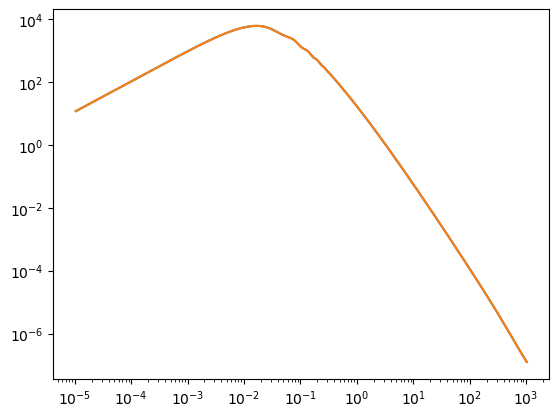

In [27]:
plt.figure()
plt.loglog(kh, matter_power)
plt.loglog(kh2, PK[0])

In [28]:
#Get the evolution
z = np.linspace(0, 5, 51)   # or whatever you used for f(z)
ev = results.get_redshift_evolution([1e-5], z, vars=['growth'])
growth = ev[0,:,0] #growth factor
growth = growth / growth[-1] #normalize to z=0
Omega_m0 = (ombh2 + omch2) / h**2
Hz = H0 * np.sqrt(Omega_m0*(1+z)**3 + (1.0 - Omega_m0))
E2 = (Hz / H0)**2
Omega_m_z = Omega_m0 * (1+z)**3 / E2
omega_m_055 = Omega_m_z**0.55

z_tracers = {'QSO':1.491,
            'LRG1':0.510,
            'LRG2':0.706, 
            'LRG3':0.930,
            'ELG1':0.930,
            'ELG2':1.317,
            }

f_z_func = UnivariateSpline(z, omega_m_055, s=0)
transfer_func = UnivariateSpline(k,transfer)
growth_func = UnivariateSpline(z, growth)

fz_tracers = {x:f_z_func(z_tracers[x]) for x in z_tracers.keys()}
D_tracers = {x:growth_func(z_tracers[x]) for x in z_tracers.keys()}

print(fz_tracers)
print(D_tracers)
np.savetxt(out_path+t+'_transfer.txt', np.array([k, transfer]).T, header='k [1/Mpc] transfer [physical units]', fmt='%10.5e')

{'QSO': array(0.92980068), 'LRG1': array(0.7630154), 'LRG2': array(0.81813049), 'LRG3': array(0.86408766), 'ELG1': array(0.86408766), 'ELG2': array(0.91477001)}
{'QSO': array(0.93476011), 'LRG1': array(0.74638097), 'LRG2': array(0.79801665), 'LRG3': array(0.84780707), 'ELG1': array(0.84780707), 'ELG2': array(0.91304592)}


In [ ]:
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
primordial_PK = results.Params.scalar_power(k)
matter_power = primordial_PK*transfer**2*k**4 / (k**3/(2*np.pi**2))
plt.figure()
plt.loglog(kh, matter_power)


In [ ]:
np.max(k)

In [ ]:
pars.h